In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

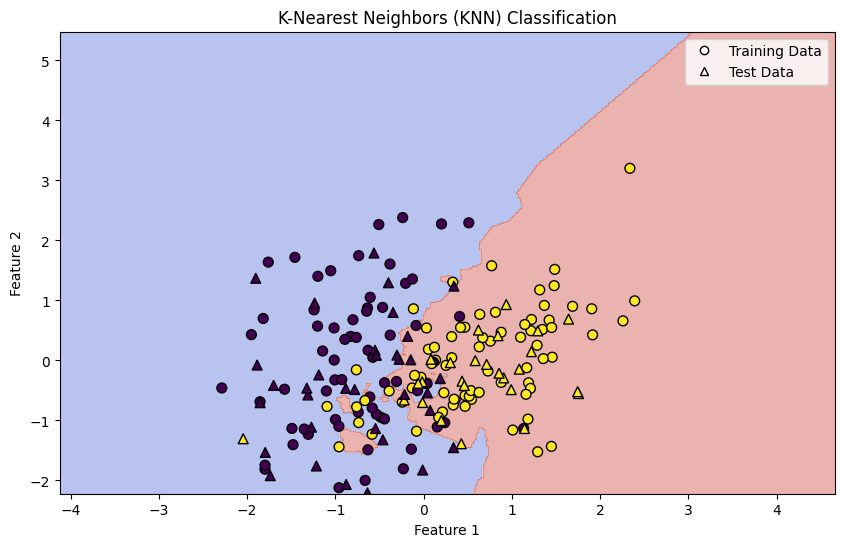

In [3]:
# Generate a synthetic dataset with 2 features for easy visualization
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the KNN classifier and train it
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for visualization
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the output for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', edgecolor='k', s=50)
legend_handles = []
legend_handles.append(plt.Line2D([0], [0], marker='o', markeredgecolor='k',  markerfacecolor='w', linestyle='', label='Training Data'))
legend_handles.append(plt.Line2D([0], [0], marker='^', markeredgecolor='k',  markerfacecolor='w', linestyle='', label='Test Data'))
plt.title("K-Nearest Neighbors (KNN) Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(handles=legend_handles,  loc='upper right')
plt.show()